## 第一：从当前工作路径读取数据

In [1]:
import pandas as pd

# 读取数据
file_path = 'think.xlsx'  # 确保文件名与路径正确
data = pd.read_excel(file_path)

# 显示数据的前几行
data.head()

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,分组,编号,姓名,参与日期,年龄,性别,教育程度（文盲/小学/初中/高中、中专/大专、本科及以上）,婚育状况（未婚未育/已婚未育/已婚已育/离婚）,在近1月内是否工作/学习（全职/间断/完全无）,近1月内的平均睡眠时间（h）,...,0 PHQ-9,2 GAD-7,2 PHQ-15,2 PHQ-9,4 GAD-7,4 PHQ-15,4 PHQ-9,4 五因素正念量表,4 阿森斯睡眠量表,随访结果（是否坚持做冥想）
0,B,1,任可欣,8.28,22,女,大专、本科及以上,未婚,全职,7.0,...,9.0,3.0,5.0,3.0,4.0,6.0,4.0,116.0,1.0,否
1,B,2,沈一,8.28,42,女,大专、本科及以上,未婚,全职,6.5,...,7.0,7.0,7.0,5.0,3.0,10.0,7.0,131.0,7.0,是
2,B,3,陈秀岳,拟10月,43,女,大专、本科及以上,已婚已育,全职,8.0,...,14.0,NaN,NaN,NaN,7.0,9.0,4.0,122.0,7.0,否
3,A,4,郑欢,10.7,26,女,高中、中专,已婚未育,完全无,6.0,...,3.0,2.0,6.0,2.0,2.0,8.0,3.0,148.0,5.0,NaN
4,A,5,方思名,10.9,25,女,大专、本科及以上,未婚,间断,5.0,...,12.0,NaN,NaN,NaN,8.0,15.0,11.0,120.0,7.0,NaN


## 第二：打印各个变量的缺失值情况

In [2]:
# 检查缺失值
missing_values = data.isnull().sum()
print("缺失值情况：")
print(missing_values)

缺失值情况：
分组                                0
编号                                0
姓名                                0
参与日期                              0
年龄                                0
性别                                0
教育程度（文盲/小学/初中/高中、中专/大专、本科及以上）     0
婚育状况（未婚未育/已婚未育/已婚已育/离婚）           0
在近1月内是否工作/学习（全职/间断/完全无）           0
近1月内的平均睡眠时间（h）                    3
焦虑持续时间                            0
焦虑诊断时间（距今）                        0
是否行药物治疗                           0
是否行心理治疗或物理治疗                      0
共病                                0
是否有冥想经验                           0
五因素正念量表                           1
阿森斯睡眠量表                           1
0 GAD-7                           2
0 PHQ-15                          2
0 PHQ-9                           2
2 GAD-7                          26
2 PHQ-15                         26
2 PHQ-9                          26
4 GAD-7                           2
4 PHQ-15                          2
4 PHQ-9                           2
4 五因素正念量表            

## 第三：展示连续型变量和分类变量的分布情况

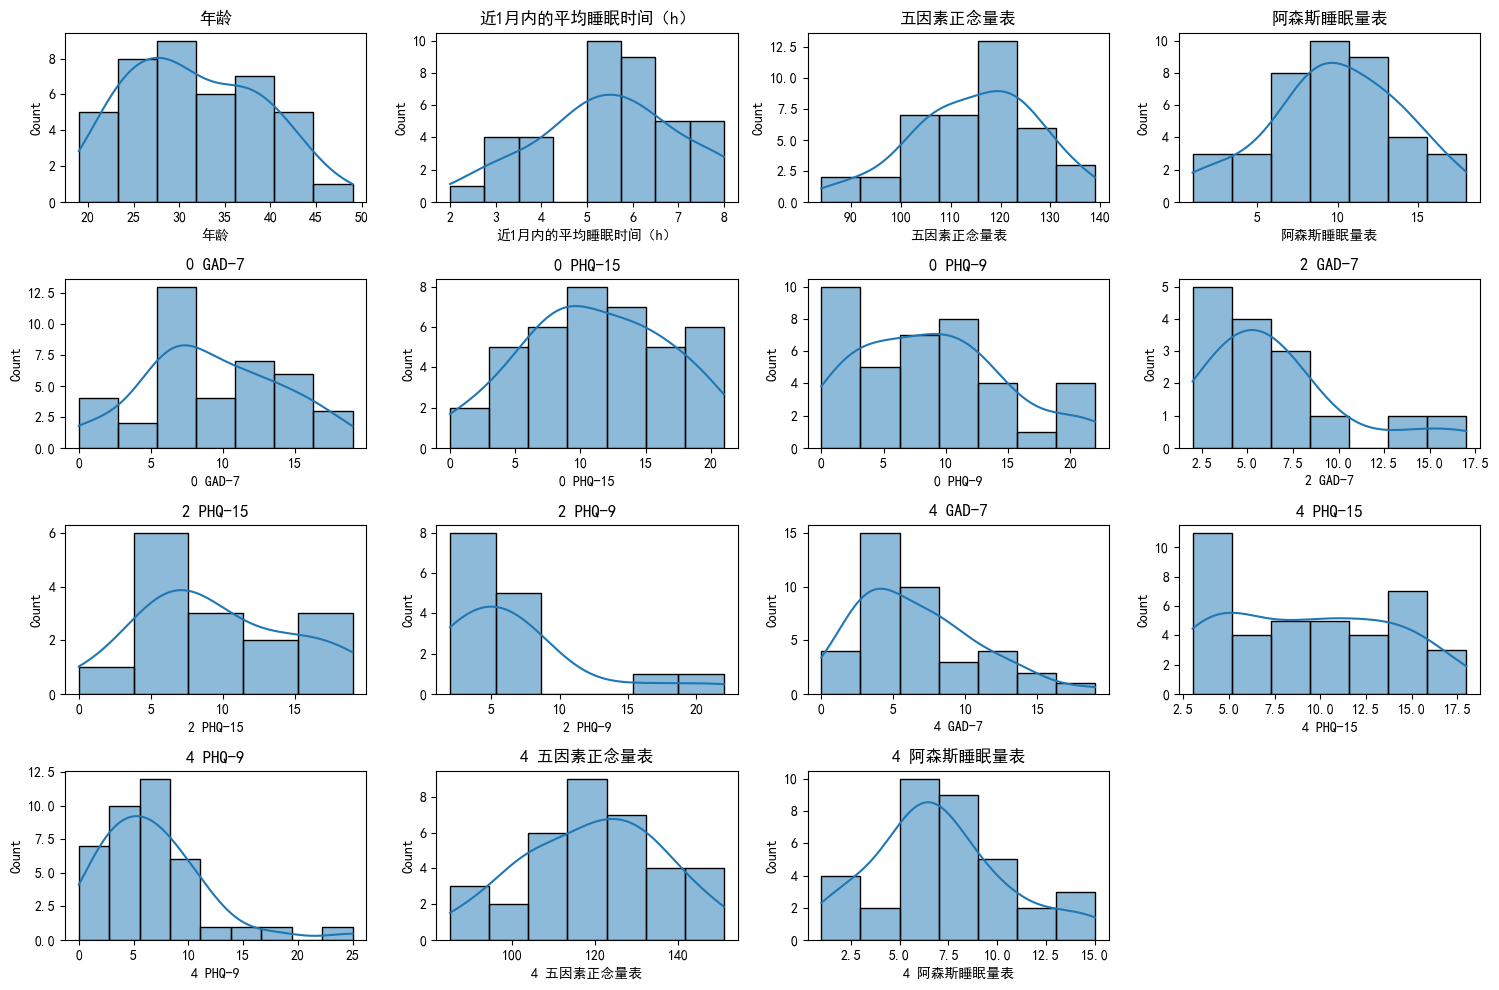

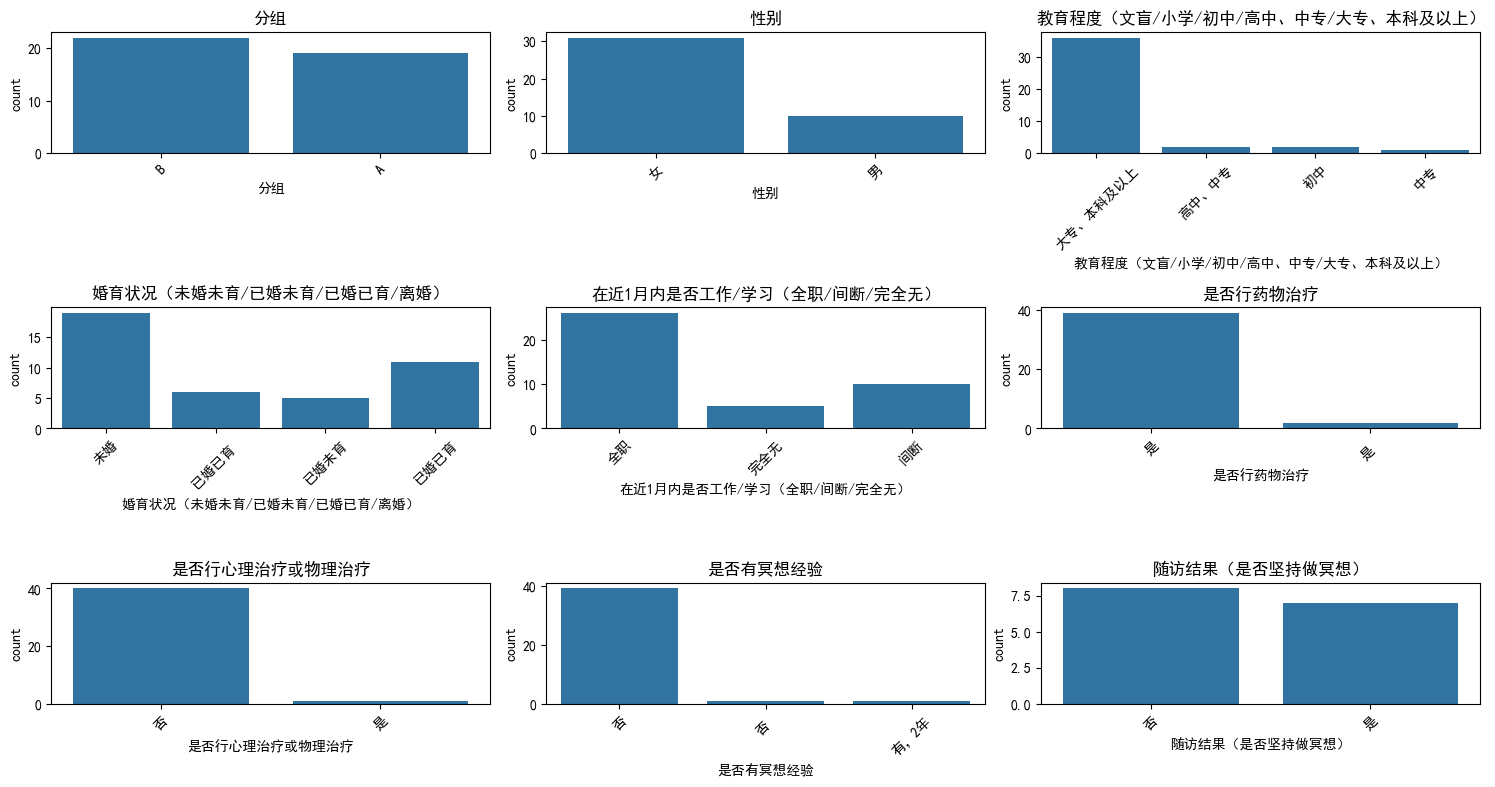

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 区分连续型变量和分类变量
continuous_vars = ['年龄', '近1月内的平均睡眠时间（h）', '五因素正念量表', '阿森斯睡眠量表', '0 GAD-7', '0 PHQ-15', '0 PHQ-9', '2 GAD-7', '2 PHQ-15', '2 PHQ-9', '4 GAD-7', '4 PHQ-15', '4 PHQ-9', '4 五因素正念量表', '4 阿森斯睡眠量表']
categorical_vars = ['分组', '性别', '教育程度（文盲/小学/初中/高中、中专/大专、本科及以上）', '婚育状况（未婚未育/已婚未育/已婚已育/离婚）', '在近1月内是否工作/学习（全职/间断/完全无）', '是否行药物治疗', '是否行心理治疗或物理治疗', '是否有冥想经验', '随访结果（是否坚持做冥想）']

# 绘制连续型变量的分布
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

# 绘制分类变量的分布
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=data[var])
    plt.title(var)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 第四：删除缺失值大于30%的变量

In [6]:
# 计算缺失值比例
missing_percentage = data.isnull().mean()

# 找出缺失值大于30%的变量
vars_to_drop = missing_percentage[missing_percentage > 0.3].index
print("缺失值大于30%的变量：")
print(vars_to_drop)

# 删除这些变量
data_cleaned = data.drop(columns=vars_to_drop)

缺失值大于30%的变量：
Index(['2 GAD-7', '2 PHQ-15', '2 PHQ-9', '随访结果（是否坚持做冥想）'], dtype='object')


## 第五：进行统计检验

In [7]:
from scipy.stats import shapiro, mannwhitneyu, ttest_ind, chi2_contingency

# 分组
group_A = data_cleaned[data_cleaned['分组'] == 'A']
group_B = data_cleaned[data_cleaned['分组'] == 'B']

# 对连续型变量进行检验
print("连续型变量检验结果：")
for var in continuous_vars:
    if var in data_cleaned.columns:  # 确保变量未被删除
        # 检查正态性
        stat_A, p_A = shapiro(group_A[var].dropna())
        stat_B, p_B = shapiro(group_B[var].dropna())
        
        if p_A > 0.05 and p_B > 0.05:  # 正态性检验通过
            print(f"{var} - 正态性检验通过，进行t检验")
            t_stat, t_p = ttest_ind(group_A[var].dropna(), group_B[var].dropna())
            print(f"t检验结果：t统计量={t_stat:.2f}, p值={t_p:.4f}")
        else:
            print(f"{var} - 正态性检验未通过，进行非参数检验")
            u_stat, u_p = mannwhitneyu(group_A[var].dropna(), group_B[var].dropna())
            print(f"非参数检验结果：U统计量={u_stat}, p值={u_p:.4f}")

# 对分类变量进行卡方检验
print("\n分类变量卡方检验结果：")
for var in categorical_vars:
    if var in data_cleaned.columns and var != '分组':  # 确保变量未被删除且不是分组变量
        contingency_table = pd.crosstab(data_cleaned['分组'], data_cleaned[var])
        chi2_stat, chi2_p, dof, expected = chi2_contingency(contingency_table)
        print(f"{var} - 卡方检验结果：卡方统计量={chi2_stat:.2f}, p值={chi2_p:.4f}")

连续型变量检验结果：
年龄 - 正态性检验通过，进行t检验
t检验结果：t统计量=0.77, p值=0.4464
近1月内的平均睡眠时间（h） - 正态性检验通过，进行t检验
t检验结果：t统计量=0.25, p值=0.8050
五因素正念量表 - 正态性检验通过，进行t检验
t检验结果：t统计量=0.61, p值=0.5462
阿森斯睡眠量表 - 正态性检验通过，进行t检验
t检验结果：t统计量=0.43, p值=0.6708
0 GAD-7 - 正态性检验通过，进行t检验
t检验结果：t统计量=-0.58, p值=0.5658
0 PHQ-15 - 正态性检验通过，进行t检验
t检验结果：t统计量=0.53, p值=0.6024
0 PHQ-9 - 正态性检验通过，进行t检验
t检验结果：t统计量=0.02, p值=0.9837
4 GAD-7 - 正态性检验未通过，进行非参数检验
非参数检验结果：U统计量=196.5, p值=0.8427
4 PHQ-15 - 正态性检验通过，进行t检验
t检验结果：t统计量=1.37, p值=0.1775
4 PHQ-9 - 正态性检验未通过，进行非参数检验
非参数检验结果：U统计量=208.0, p值=0.6010
4 五因素正念量表 - 正态性检验通过，进行t检验
t检验结果：t统计量=-1.07, p值=0.2941
4 阿森斯睡眠量表 - 正态性检验通过，进行t检验
t检验结果：t统计量=2.61, p值=0.0137

分类变量卡方检验结果：
性别 - 卡方检验结果：卡方统计量=0.01, p值=0.9221
教育程度（文盲/小学/初中/高中、中专/大专、本科及以上） - 卡方检验结果：卡方统计量=1.23, p值=0.7455
婚育状况（未婚未育/已婚未育/已婚已育/离婚） - 卡方检验结果：卡方统计量=6.55, p值=0.0877
在近1月内是否工作/学习（全职/间断/完全无） - 卡方检验结果：卡方统计量=6.07, p值=0.0480
是否行药物治疗 - 卡方检验结果：卡方统计量=0.39, p值=0.5349
是否行心理治疗或物理治疗 - 卡方检验结果：卡方统计量=0.01, p值=0.9408
是否有冥想经验 - 卡方检验结果：卡方统计量=1.82, p值=0.4034


## 第六：前后对比

检查正态性：使用 Shapiro-Wilk 检验检查每个变量在 A 组和 B 组中的分布是否符合正态分布。

选择检验方法：
- 如果变量在两组中均符合正态分布，则使用 成对 t 检验（paired t-test），因为这些变量是同一组受试者在不同时间点的测量结果。
- 如果变量在任一组中不符合正态分布，则使用 Wilcoxon 符号秩检验（Wilcoxon signed-rank test），这是成对 t 检验的非参数替代方法。

In [11]:
from scipy.stats import shapiro, ttest_rel, wilcoxon

# 定义变量对应关系
variable_pairs = [
    ('五因素正念量表', '4 阿森斯睡眠量表'),
    ('阿森斯睡眠量表', '4 五因素正念量表'),
    ('0 GAD-7', '4 GAD-7'),
    ('0 PHQ-15', '4 PHQ-15'),
    ('0 PHQ-9', '4 PHQ-9')
]

# 分组
group_A = data_cleaned[data_cleaned['分组'] == 'A']
group_B = data_cleaned[data_cleaned['分组'] == 'B']

# 对每对变量进行检验
for var1, var2 in variable_pairs:
    print(f"\n检验变量对：{var1} 和 {var2}")
    
    # 检查正态性
    normality_A1 = shapiro(group_A[var1].dropna())
    normality_A2 = shapiro(group_A[var2].dropna())
    normality_B1 = shapiro(group_B[var1].dropna())
    normality_B2 = shapiro(group_B[var2].dropna())
    
    print(f"正态性检验结果（A组 {var1}）: p={normality_A1.pvalue:.4f}")
    print(f"正态性检验结果（A组 {var2}）: p={normality_A2.pvalue:.4f}")
    print(f"正态性检验结果（B组 {var1}）: p={normality_B1.pvalue:.4f}")
    print(f"正态性检验结果（B组 {var2}）: p={normality_B2.pvalue:.4f}")
    
    # 选择检验方法
    if (normality_A1.pvalue > 0.05 and normality_A2.pvalue > 0.05 and
        normality_B1.pvalue > 0.05 and normality_B2.pvalue > 0.05):
        print("正态性检验通过，使用成对 t 检验")
        
        # 确保成对数据的完整性
        aligned_A = group_A[[var1, var2]].dropna()
        aligned_B = group_B[[var1, var2]].dropna()
        
        t_stat_A, t_p_A = ttest_rel(aligned_A[var1], aligned_A[var2])
        t_stat_B, t_p_B = ttest_rel(aligned_B[var1], aligned_B[var2])
        
        print(f"A组成对 t 检验结果：t统计量={t_stat_A:.2f}, p值={t_p_A:.4f}")
        print(f"B组成对 t 检验结果：t统计量={t_stat_B:.2f}, p值={t_p_B:.4f}")
    else:
        print("正态性检验未通过，使用 Wilcoxon 符号秩检验")
        
        # 确保成对数据的完整性
        aligned_A = group_A[[var1, var2]].dropna()
        aligned_B = group_B[[var1, var2]].dropna()
        
        w_stat_A, w_p_A = wilcoxon(aligned_A[var1], aligned_A[var2])
        w_stat_B, w_p_B = wilcoxon(aligned_B[var1], aligned_B[var2])
        
        print(f"A组 Wilcoxon 符号秩检验结果：W统计量={w_stat_A}, p值={w_p_A:.4f}")
        print(f"B组 Wilcoxon 符号秩检验结果：W统计量={w_stat_B}, p值={w_p_B:.4f}")


检验变量对：五因素正念量表 和 4 阿森斯睡眠量表
正态性检验结果（A组 五因素正念量表）: p=0.7881
正态性检验结果（A组 4 阿森斯睡眠量表）: p=0.4984
正态性检验结果（B组 五因素正念量表）: p=0.9917
正态性检验结果（B组 4 阿森斯睡眠量表）: p=0.2673
正态性检验通过，使用成对 t 检验
A组成对 t 检验结果：t统计量=27.27, p值=0.0000
B组成对 t 检验结果：t统计量=31.68, p值=0.0000

检验变量对：阿森斯睡眠量表 和 4 五因素正念量表
正态性检验结果（A组 阿森斯睡眠量表）: p=0.4937
正态性检验结果（A组 4 五因素正念量表）: p=0.7496
正态性检验结果（B组 阿森斯睡眠量表）: p=0.6638
正态性检验结果（B组 4 五因素正念量表）: p=0.6339
正态性检验通过，使用成对 t 检验
A组成对 t 检验结果：t统计量=-20.72, p值=0.0000
B组成对 t 检验结果：t统计量=-28.11, p值=0.0000

检验变量对：0 GAD-7 和 4 GAD-7
正态性检验结果（A组 0 GAD-7）: p=0.6553
正态性检验结果（A组 4 GAD-7）: p=0.4183
正态性检验结果（B组 0 GAD-7）: p=0.3987
正态性检验结果（B组 4 GAD-7）: p=0.0099
正态性检验未通过，使用 Wilcoxon 符号秩检验
A组 Wilcoxon 符号秩检验结果：W统计量=29.5, p值=0.0818
B组 Wilcoxon 符号秩检验结果：W统计量=19.0, p值=0.0022

检验变量对：0 PHQ-15 和 4 PHQ-15
正态性检验结果（A组 0 PHQ-15）: p=0.8771
正态性检验结果（A组 4 PHQ-15）: p=0.1462
正态性检验结果（B组 0 PHQ-15）: p=0.8853
正态性检验结果（B组 4 PHQ-15）: p=0.0741
正态性检验通过，使用成对 t 检验
A组成对 t 检验结果：t统计量=1.07, p值=0.2981
B组成对 t 检验结果：t统计量=2.42, p值=0.0252

检验变量对：0 PHQ-9 和 4 PHQ-9
正态性检验结果（A组